<a href="https://colab.research.google.com/github/Apoorva-Khare/ML_Models_Implementation/blob/main/Heirarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hierarchical clustering**

It is a method of cluster analysis that seeks to build a hierarchy of clusters.
It does this by either merging smaller clusters into larger ones (agglomerative) or by splitting larger clusters into smaller ones (divisive).
The resulting hierarchy is often visualized using a dendrogram

**Key Concepts:**

**Agglomerative clustering:**
Starts with each data point as its own cluster and iteratively merges the closest clusters until all points are in a single cluster.

**Divisive clustering:**
Starts with all data points in one cluster and recursively splits it into smaller clusters until each point is in its own cluster.

**Dendrogram:**
A tree-like diagram that visualizes the hierarchical structure of the clusters, showing the relationships and distances between them.

**How it works:**
1. **Distance Calculation:**
The algorithm first calculates the distance or similarity between all pairs of data points.

2. **Merging/Splitting:**
Depending on the chosen approach (agglomerative or divisive), it either merges the closest clusters or splits the most dissimilar ones, updating the distance matrix accordingly.

3. **Iteration:**
This process continues until a stopping criterion is met (e.g., all points are in one cluster, or a desired number of clusters is reached)

In hierarchical clustering, there are several linkage methods (also called agglomeration methods) that determine how the distance between clusters is calculated during the clustering process.

| Method           | Description                        | Shape of Clusters    |
| ---------------- | ---------------------------------- | -------------------- |
| Single Linkage   | Minimum distance between points    | Chain-like           |
| Complete Linkage | Maximum distance between points    | Compact              |
| Average Linkage  | Average distance between all pairs | Balanced             |
| Centroid Linkage | Distance between cluster centroids | May cause inversions |
| Ward’s Method    | Minimizes within-cluster variance  | Spherical, compact   |
| Median Linkage   | Uses coordinate median             | Less common          |
| Weighted Linkage | Equal weight average of clusters   | Similar to average   |


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
x = np.array([[1,2],[2,3],[3,4],[8,7],[8,8],[25,80]])

In [ ]:
linked = linkage(x, method = 'ward')

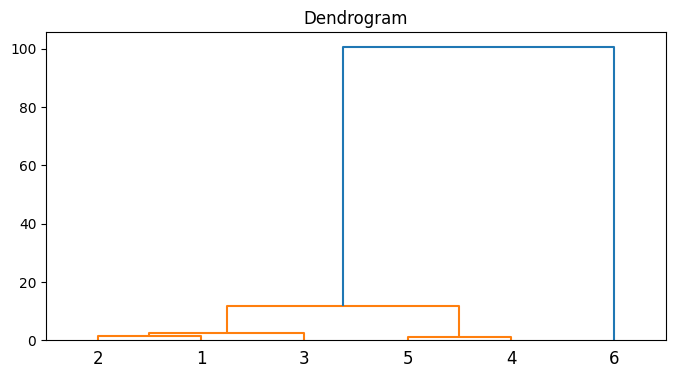

In [ ]:
plt.figure(figsize = (8,4))
dendrogram(linked, orientation = 'top', labels = np.arange(1,len(x)+1), distance_sort = 'descending', show_leaf_counts= True)
plt.title("Dendrogram")
plt.show()


In [ ]:
##-------------------------------------------Agglomerative------------------------------------------------------


In [ ]:
from sklearn.cluster import AgglomerativeClustering

x = np.array([[1,2],[2,3],[3,4],[8,7],[8,8],[25,80]])

model = AgglomerativeClustering(2)   #try with 2 cluster
model.fit(x)

print("Clusters: ", model.labels_)

Clusters:  [0 0 0 0 0 1]


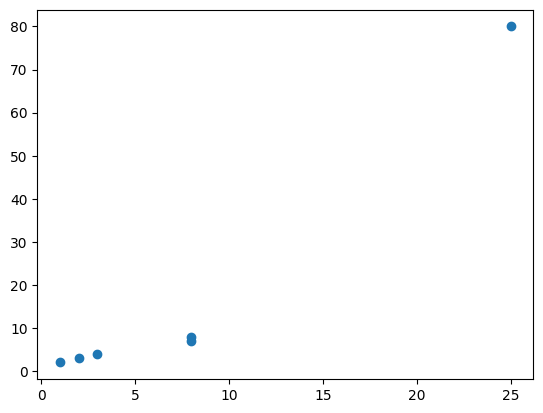

In [ ]:
plt.scatter(x[:,0],x[:,1])
plt.show()

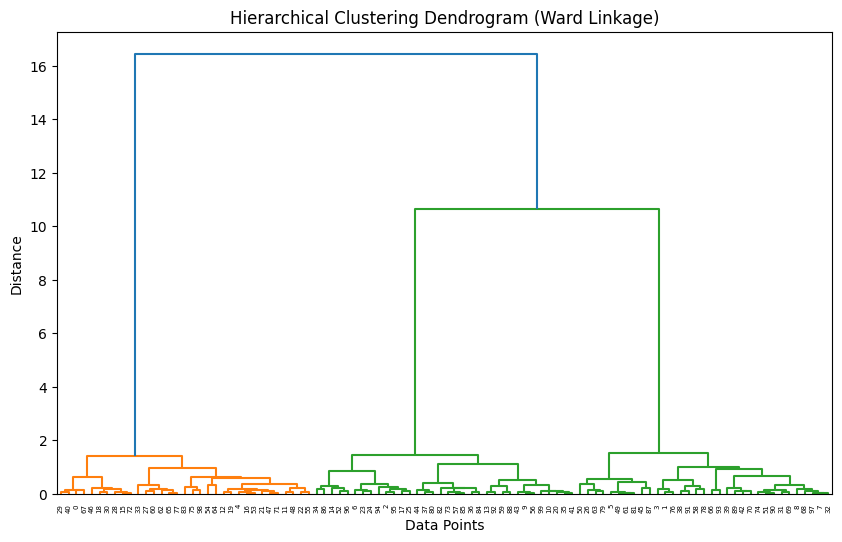

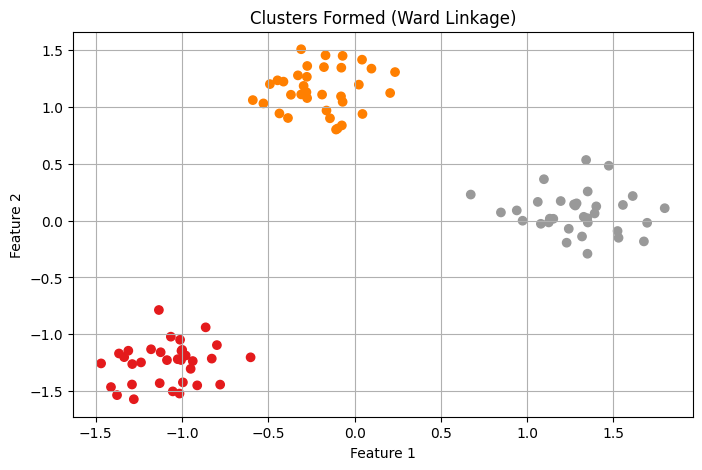

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

# 1. Generate sample data
X, y_true = make_blobs(n_samples=100, centers=3, cluster_std=1.2, random_state=42)

# 2. Scale the data (important for distance-based algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Create linkage matrix using different methods: 'ward', 'single', 'complete', 'average'
Z = linkage(X_scaled, method='ward')

# 4. Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# 5. Form clusters by cutting the dendrogram
from scipy.cluster.hierarchy import fcluster
k = 3  # number of clusters
clusters = fcluster(Z, k, criterion='maxclust')

# 6. Visualize the clustered data
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='Set1')
plt.title('Clusters Formed (Ward Linkage)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()
